In [1]:
# First we import the Gobnilp class and create a Gobnilp object as usual.
!pip install scipy
!pip install matplotlib
!pip install networkx
!pip install pandas
# !pip install pygraphviz
!pip install gurobipy
!pip install numba

In [2]:

import sys, os
from pygobnilp.gobnilp import Gobnilp
from pygobnilp.scoring import *
from matplotlib import pyplot as plt
from matplotlib import image as mpimg


C ADTree implementation unavailable.
No module named 'adtree'


In [3]:
%matplotlib inline
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
img = mpimg.imread('data/clgaussian.png')
imgplot = ax.imshow(img)

FileNotFoundError: [Errno 2] No such file or directory: 'data/clgaussian.png'

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -18384.24434570371
**********
A<- -1567.5240292460182
D<-A,G,H -1315.8861431690711
G<-A,H -19406.076835724594
H<-A 3447.7354312555203
E<-A,D,F,G,H 627.6573917060196
F<-D,G,H -170.15016052556894
**********
bnlearn modelstring = 
[A][D|G:H:A][G|H:A][H|A][E|A:F:D:H:G][F|D:H:G]
**********
CPDAG:
Vertices: A,D,G,H,E,F
A-D
A->E
A-G
A-H
D->E
D-F
G-D
G->E
G-F
H-D
H->E
H-F
H-G
F->E



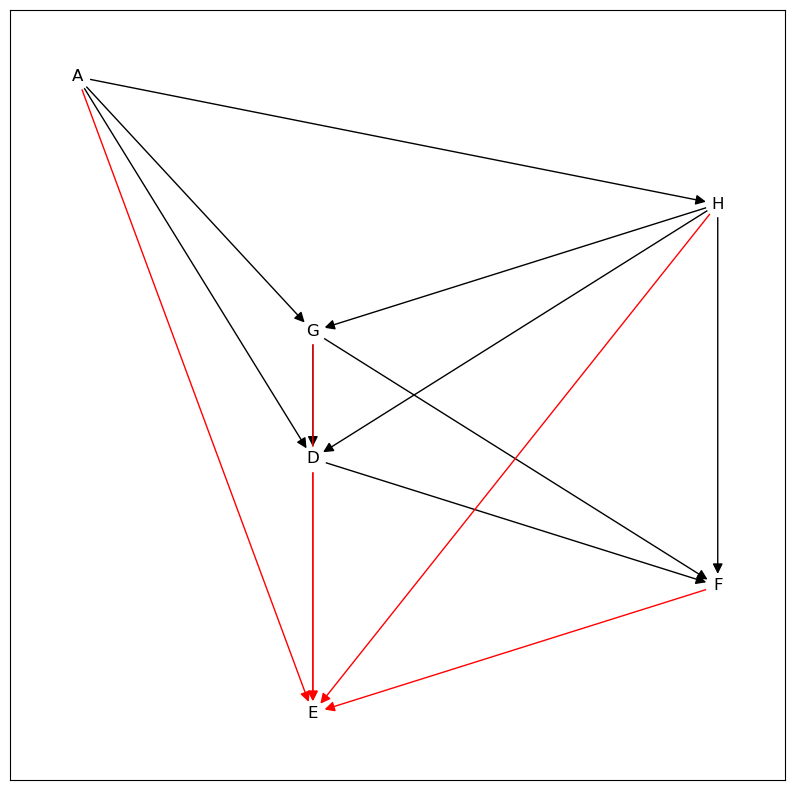

In [7]:
m = Gobnilp()
m.learn('../data/clgaussian-bin.test', data_type='mixed', score='CGaussianLL', palim=None)

In [8]:
md = MixedData('data/clgaussian.test')
model = CGaussianLL(md)

FileNotFoundError: [Errno 2] No such file or directory: 'data/clgaussian.test'

In [5]:
model.ll_score(child='A', parents=[])

(np.float64(-1567.5240292460182), 1)

In [6]:
model.ll_score(child='B', parents=['A'])

(np.float64(-5229.861118560386), 4)

In [7]:
model.ll_score(child='C', parents=['A', 'B'])

(np.float64(-6450.89370123964), 18)

In [8]:
model.ll_score(child='D', parents=['A', 'B', 'C', 'H'])

(np.float64(-1400.5524520680392), 48)

In [9]:
model.ll_score(child='E', parents=['B', 'C', 'D', 'F', 'H'])

(np.float64(-6479.529155424589), 72)

In [10]:
model.ll_score(child='F', parents=['A', 'B', 'C'])

(np.float64(-2900.7090437467014), 24)

In [11]:
model.ll_score(child='G', parents=['A', 'C', 'D', 'E', 'F', 'H'])

(np.float64(656.4949476116126), 64)

In [12]:
model.ll_score(child='H', parents=['B', 'C', 'F'])

(np.float64(3476.9487891715216), 24)

In [13]:
model.ll_score(child='A', parents=['B', 'C', 'F'])

(np.float64(-1555.4939694694713), 24)

In [14]:
model.ll_score(child='D', parents=['E', 'G', 'H'])

(np.float64(-6959.0195920561455), 4)

In [15]:
model.ll_score(child='E', parents=[])

(np.float64(-16567.383146026834), 1)

In [16]:
model.ll_score(child='G', parents=[])

(np.float64(-21692.61065751086), 1)

In [17]:
model.ll_score(child='H', parents=[])

(np.float64(3447.6991960872306), 1)

In [18]:
model.ll_score(child='A', parents=['D', 'E'])

(np.float64(5984.188918724256), 4)

In [19]:
model.ll_score(child='B', parents=['A', 'G', 'H'])

(np.float64(-4131.2493588273755), 16)

In [20]:
model.ll_score(child='C', parents=['A', 'B', 'G'])

(-5955.660649449561, 36)

In [21]:
model.ll_score(child='F', parents=['C', 'D', 'E', 'G'])

(np.float64(7266.186791624379), 28)

In [22]:
md._varidx

{'A': ('discrete', 0),
 'B': ('discrete', 1),
 'C': ('discrete', 2),
 'D': ('continuous', 0),
 'E': ('continuous', 1),
 'F': ('discrete', 3),
 'G': ('continuous', 2),
 'H': ('continuous', 3)}

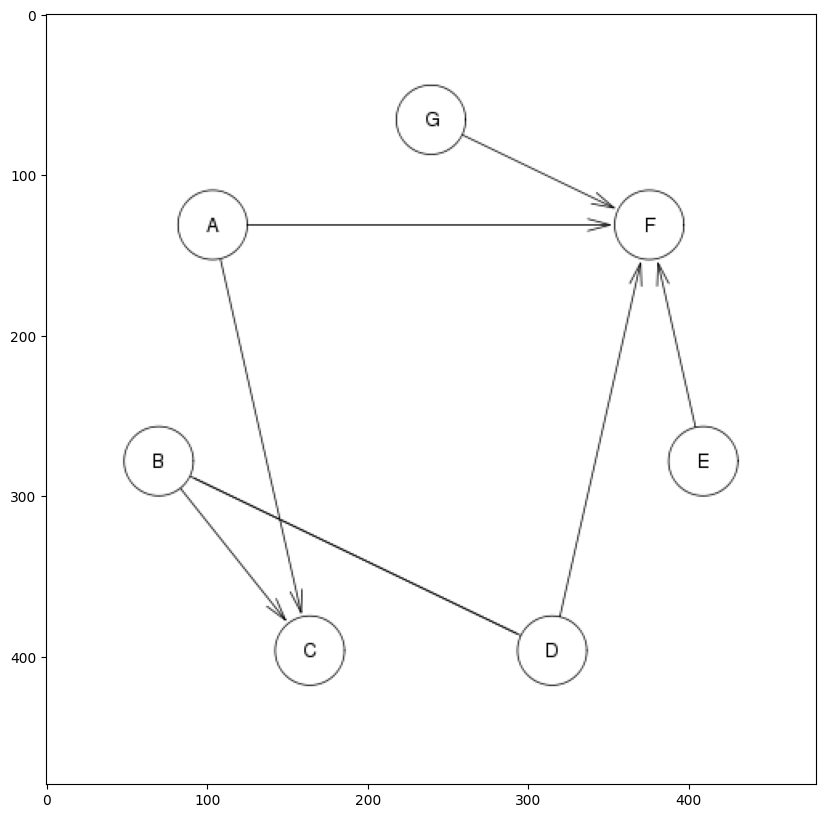

In [23]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
img = mpimg.imread('data/gaussian.png')
imgplot = ax.imshow(img)

In [24]:
m = Gobnilp()
m.learn('data/gaussian.test', data_type='continuous', score='GaussianAIC', palim=3)

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -53893.38592040918
**********
A<-B,C -108.68564253185832
B<-C,D,F 651.0666244178865
C<- -16345.235085402195
D<-C -9174.145921784928
F<-A,D,G -11108.218774702833
E<-C,F,G -7287.3299318419595
G<- -10520.837188563288
**********
bnlearn modelstring = 
[A|B:C][B|D:F:C][C][D|C][F|G:D:A][E|G:F:C][G]
**********
CPDAG:
Vertices: A,B,C,D,F,E,G
A->F
B->A
C-A
C->B
C-D
C->E
D->B
D->F
F->B
F->E
G->E
G->F



In [25]:
m = Gobnilp()
m.learn('data/clgaussian.test', data_type='mixed', score='CGaussianBIC')

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0
**********
BN has score -25925.78874578292
**********
A<-E,F,G 8443.560026235346
E<-B,D,G -6543.997251262531
G<- -21696.86925410657
F<-D,E,G 7158.322853437575
B<-G -4829.988803893114
C<-B,F -6098.491952577341
D<-B,C,G -6117.305670087183
H<-A,D 3758.9813064708965
**********
bnlearn modelstring = 
[A|E:G:F][E|B:G:D][G][F|E:G:D][B|G][C|B:F][D|B:G:C][H|D:A]
**********
CPDAG:
Vertices: A,E,G,F,B,C,D,H
A->H
E->A
E->F
G->A
G-B
G->D
G->E
G-F
F->A
F->C
B->C
B->D
B->E
C->D
D->E
D->F
D->H



In [26]:
md = MixedData('data/clgaussian.test')
model = CGaussianBIC(md)
model.score(child='H', parents='B:F'.split(':'))

(np.float64(3435.1728510311577), np.float64(3952.417656621526))

In [27]:
md = MixedData('data/clgaussian.test')
model = CGaussianBIC(md)
model.score(child='H', parents=[])

(np.float64(3443.4405994915223), np.float64(3973.7106396000668))

In [28]:
md._varidx['C']

('discrete', 2)

In [ ]:
m = Gobnilp()
m.learn('data/clgaussian.test', data_type='mixed', score='CGaussianAIC')

Set parameter PreCrush to value 1
Set parameter CutPasses to value 100000
Set parameter GomoryPasses to value 100000
Set parameter MIPFocus to value 2
Set parameter ZeroHalfCuts to value 2
Set parameter MIPGap to value 0
Set parameter MIPGapAbs to value 0


Changed value of parameter PreCrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter CutPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter GomoryPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter ZeroHalfCuts to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPGapAbs to 0.0
   Prev: 1e-10  Min: 0.0  Max: inf  Default: 1e-10
**********
BN has score -141132.5829155534
**********
X1<-X4,X6,X9 -11197.561823893633
X9<-X19,X3 -5356.213665868992
X4<-X19,X3,X9 -3783.20907107574
X6<-X19,X4,X9 -2778.538053450884
X10<-X4,X8,X9 -2617.6682768854917
X8<-X2,X4,X5 -11787.097235751593
X11<-X2,X3,X4 -3125.5447347585505
X3<- -9894.271341639418
X2<-X1,X5,X9 -2853.8039183906694
X12<-X16,X7,X8 -10153.026

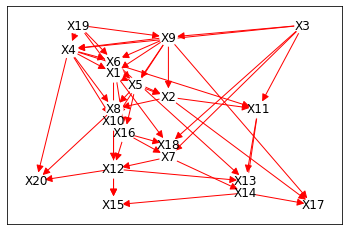

In [32]:
m = Gobnilp()
m.learn('data/tetraddata_20_1.txt', data_type='mixed', score='CGaussianLL')

Changed value of parameter PreCrush to 1
   Prev: 0  Min: 0  Max: 1  Default: 0
Changed value of parameter CutPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter GomoryPasses to 100000
   Prev: -1  Min: -1  Max: 2000000000  Default: -1
Changed value of parameter MIPFocus to 2
   Prev: 0  Min: 0  Max: 3  Default: 0
Changed value of parameter ZeroHalfCuts to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Changed value of parameter MIPGap to 0.0
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter MIPGapAbs to 0.0
   Prev: 1e-10  Min: 0.0  Max: inf  Default: 1e-10
**********
BN has score -135868.60462754502
**********
X1<-X10,X5,X9 -2890.621788629648
X9<-X10,X5,X7 -2649.494486291337
X5<-X10 -2986.3771489488145
X10<- -3469.7444952286014
X11<-X2,X3 -9911.601654826727
X3<-X18,X5,X9 -10189.673917958264
X2<-X1,X12,X5 -2501.9747587947577
X12<-X19,X5,X7 -2902.9974900776933
X19<-X10,X8 -3286.6834596244594
X7<-X10,X5,X8 -2831.64169

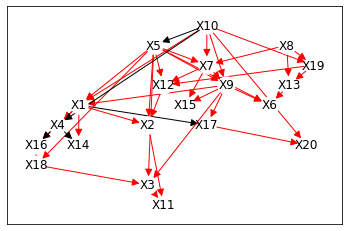

In [33]:
m = Gobnilp()
m.learn('data/tetraddata_20_2.txt', data_type='mixed', score='CGaussianBIC')